<a href="https://colab.research.google.com/github/so-yeon-hwang/DataSciencePractice/blob/main/23_11_15_Latent_Factor_Model%20%2B%20Regularization%20%2B%20bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

--2023-11-15 11:13:36--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  3.08MB/s    in 1.5s    

2023-11-15 11:13:39 (3.08 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.ba

In [2]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("ml-100k/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("ml-100k/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [4]:
# data transformation to pytorch tensor

# train data
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

# test data
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [21]:
items, items.shape

(tensor([   1,    2,    3,  ..., 1188, 1228, 1330]), torch.Size([90570]))

In [22]:
P[items],P[items].shape

(tensor([[-0.0643,  0.8606,  0.0439,  ..., -0.8719,  0.8639, -0.6019],
         [-0.8155,  0.3879,  0.0707,  ..., -1.2565,  0.5831,  0.1076],
         [-0.9594,  0.3072,  0.6690,  ..., -0.1820,  1.4553,  0.5335],
         ...,
         [ 0.7358,  0.9872,  0.7773,  ..., -0.7295,  0.5260,  0.5029],
         [-0.2750,  0.2518, -0.7141,  ..., -0.8016,  0.5041, -0.0744],
         [-1.6972,  0.5186, -0.6948,  ..., -0.5619,  2.2957,  1.6360]],
        grad_fn=<IndexBackward0>),
 torch.Size([90570, 10]))

# Latent Factor Model

In [8]:
rank = 10 # Dimension
num_items = items.max() + 1 # 개수
num_users = users.max() + 1

P = torch.randn(num_items, rank, requires_grad = True)
Q = torch.randn(num_users, rank, requires_grad = True)

P.shape, Q.shape # 1683 movies, 944 users

(torch.Size([1683, 10]), torch.Size([944, 10]))

# 1. Basic Matrix Factorization

## Training Set Learning + MSE Visualization

epoch: 0, cost: 23.869240
epoch: 100, cost: 0.562045
epoch: 200, cost: 0.494987
epoch: 300, cost: 0.470996
epoch: 400, cost: 0.459478
epoch: 500, cost: 0.453460
epoch: 600, cost: 0.449726
epoch: 700, cost: 0.447054
epoch: 800, cost: 0.444998
epoch: 900, cost: 0.443364


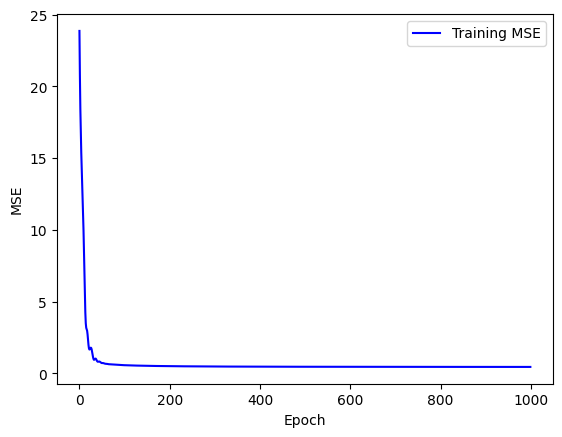

In [18]:
# 1. Matrix reset
rank = 10 # Dimension
num_items = items.max() + 1 # 개수
num_users = users.max() + 1

P = torch.randn(num_items, rank, requires_grad = True)
Q = torch.randn(num_users, rank, requires_grad = True)


# 2. Learning
optimizer = torch.optim.Adam([P,Q], lr = 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  h = torch.sum(P[items] * Q[users],dim = 1)
  cost = F.mse_loss(h,ratings)

  X.append(epoch)
  Y.append(cost.item())

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0 :
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))


# 3. Visualization : Training set MSE
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.plot(X,Y,c = 'blue', label = 'Training MSE')
plt.legend()
plt.show()

## Test set MSE

epoch: 0, cost: 23.900356
epoch: 100, cost: 0.559787
epoch: 200, cost: 0.492960
epoch: 300, cost: 0.472180
epoch: 400, cost: 0.462513
epoch: 500, cost: 0.456846
epoch: 600, cost: 0.452755
epoch: 700, cost: 0.449994
epoch: 800, cost: 0.448100
epoch: 900, cost: 0.446632


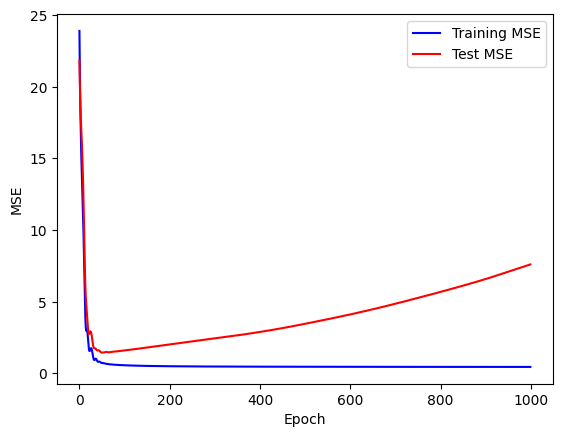

In [25]:
# 1. Matrix reset
rank = 10 # Dimension
num_items = items.max() + 1 # 개수
num_users = users.max() + 1

P = torch.randn(num_items, rank, requires_grad = True)
Q = torch.randn(num_users, rank, requires_grad = True)


# 2. Learning
optimizer = torch.optim.Adam([P,Q], lr = 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  h = torch.sum(P[items] * Q[users],dim = 1)
  cost = F.mse_loss(h,ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad(): # Stopg calculating Gradient calculating 기울기 계산 stop
    X.append(epoch)
    Y.append(cost.item())

    h_test = torch.sum(P[items_test] * Q[users_test],dim=1)
    cost_test = F.mse_loss(h_test,ratings_test)

    Y_test.append(cost_test.item())

  if epoch % 100 == 0 :
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))


# 3. Visualization : Training set MSE + Test set MSE

plt.ylabel('MSE')
plt.xlabel('Epoch')

plt.plot(X,Y,c = 'blue', label = 'Training MSE')
plt.plot(X,Y_test,c = 'red',label ='Test MSE')

plt.legend()
plt.show()

# 2. Regularization

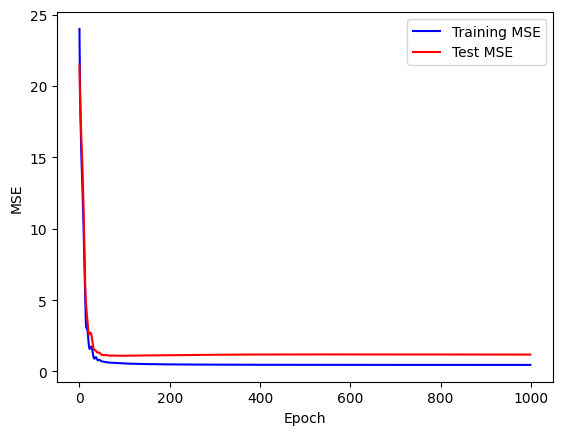

In [33]:
# 1. Matrix reset
rank = 10
num_items = items.max() + 1 # 개수
num_users = users.max() + 1

P = torch.randn(num_items, rank, requires_grad = True)
Q = torch.randn(num_users, rank, requires_grad = True)

# 2. Learning

optimizer = torch.optim.Adam([P,Q], lr = 0.1)

lambda1 = 0.1
lambda2 = 0.1

X = []
Y = []
Y_test = []
for epoch in range(1000):

  h = torch.sum(P[items] * Q[users],dim = 1)
  cost = F.mse_loss(h,ratings)
  # Regularization 비용함수
  cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean() # loss

  # 기울기 계산
  optimizer.zero_grad()
  cost_reg.backward()
  optimizer.step()

  with torch.no_grad():
    h_test = torch.sum(P[items_test] * Q[users_test],dim=1)
    cost_test = F.mse_loss(h_test,ratings_test)

    X.append(epoch)
    Y.append(cost.item())
    Y_test.append(cost_test.item())

# 3. Visualization : Training set MSE + Test set MSE

plt.ylabel('MSE')
plt.xlabel('Epoch')

plt.plot(X,Y,c = 'blue', label = 'Training MSE')
plt.plot(X,Y_test,c = 'red',label ='Test MSE')

plt.legend()
plt.show()

# 3. + Regularization + Bias

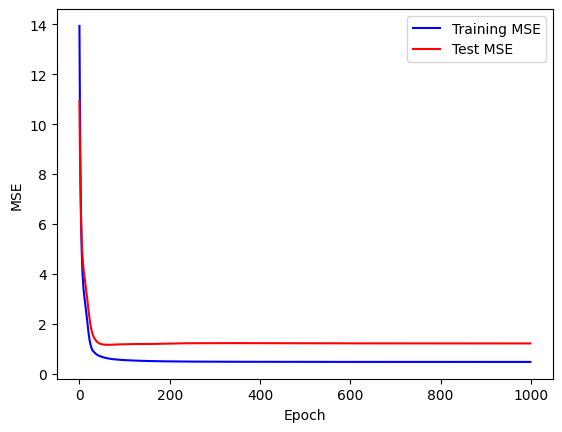

In [37]:
# 1. Matrix reset
rank = 10
num_items = items.max() + 1
num_users = users.max() + 1

P = torch.randn(num_items, rank, requires_grad = True)
Q = torch.randn(num_users, rank, requires_grad = True)

# 2. Learning

optimizer = torch.optim.Adam([P,Q], lr = 0.1)

lambda1 = 0.1
lambda2 = 0.1
lambda3 = 0.1
lambda4 = 0.1

bias_item = torch.randn(num_items, requires_grad = True)
bias_user = torch.randn(num_users, requires_grad = True)
mean = ratings.mean()

X = []
Y = []
Y_test = []


for epoch in range(1000):

  h = torch.sum(P[items] * Q[users],dim = 1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(h,ratings)
  loss = cost + lambda1 * (P **2).mean() + lambda2 * (Q ** 2).mean() + lambda3 * (bias_item **2).mean() + lambda4 * (bias_user ** 2).mean()

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    h_test = (P[items_test] * Q[users_test]).sum(dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(h_test,ratings_test)

    X.append(epoch)
    Y.append(cost.item())
    Y_test.append(cost_test.item())

# 3. Visualization : Training set MSE + Test set MSE

plt.ylabel('MSE')
plt.xlabel('Epoch')

plt.plot(X,Y,c = 'blue', label = 'Training MSE')
plt.plot(X,Y_test,c = 'red',label ='Test MSE')

plt.legend()
plt.show()